# Predicting churn for bank

**Importing all the necessary libraries**

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [201]:
data = pd.read_csv("../input/predicting-churn-for-bank-customers/Churn_Modelling.csv")

**For checking correlation between features**

In [202]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [203]:
data.shape

(10000, 14)

**Let's observer data**

In [204]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [205]:
data["Geography"].unique() #checking for unique values in Geography

array(['France', 'Spain', 'Germany'], dtype=object)

In [206]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [207]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Visualization

<Figure size 1080x1080 with 0 Axes>

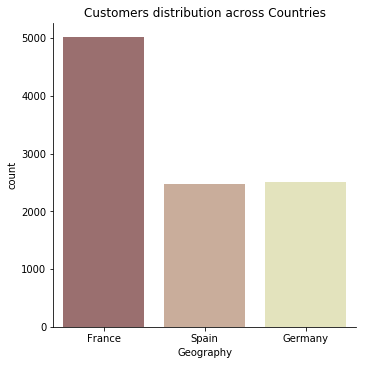

In [208]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'Geography', kind = 'count', data = data, palette = 'pink')
plt.title('Customers distribution across Countries')
plt.show()

**Maximum customers from France**

<Figure size 1080x1080 with 0 Axes>

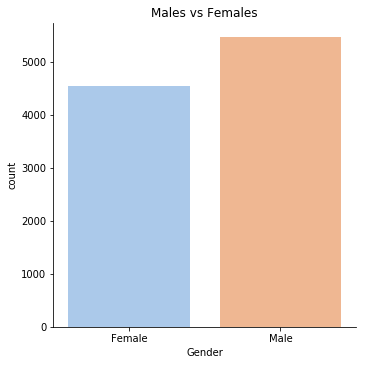

In [209]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'Gender', kind = 'count', data = data, palette = 'pastel')
plt.title("Males vs Females")
plt.show()

**We have more male customers**

<Figure size 1080x1080 with 0 Axes>

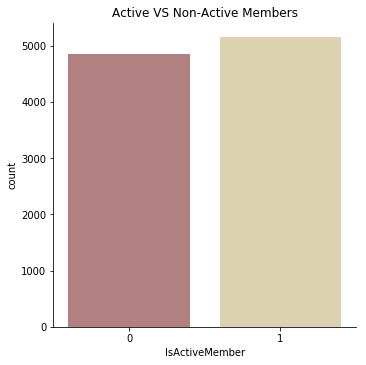

In [210]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'IsActiveMember', kind = 'count', data = data, palette = 'pink')
plt.title("Active VS Non-Active Members")
plt.show()

**We have more active members**

<Figure size 1080x1080 with 0 Axes>

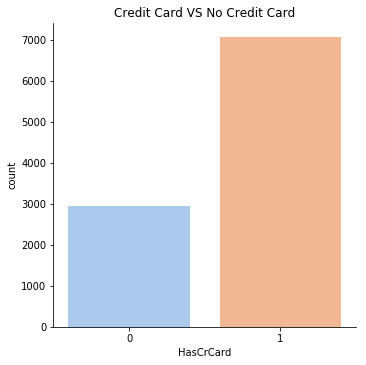

In [211]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'HasCrCard', kind = 'count', palette = 'pastel', data = data)
plt.title("Credit Card VS No Credit Card")
plt.show()

**Most of the customers have credit card**

<Figure size 1080x1080 with 0 Axes>

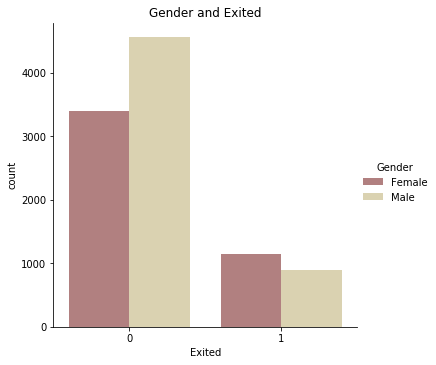

In [212]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'Exited', kind = 'count', hue = 'Gender', palette = 'pink', data = data)
plt.title("Gender and Exited")
plt.show()

**Females are more likely to exit**

<Figure size 1080x1080 with 0 Axes>

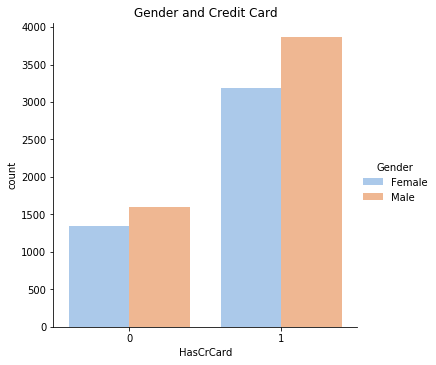

In [213]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'HasCrCard', kind = 'count', hue = 'Gender', palette = 'pastel', data = data)
plt.title("Gender and Credit Card")
plt.show()

**Males generally have credit card**

But on other hand they are more likely not to have credit cards too

<Figure size 1080x1080 with 0 Axes>

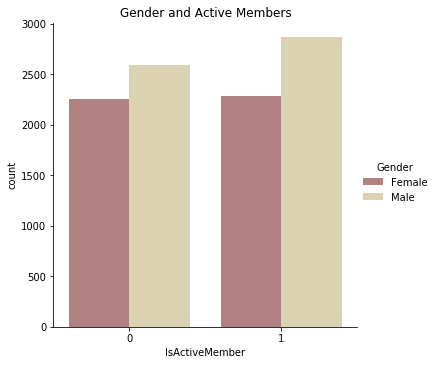

In [214]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'IsActiveMember', kind = 'count', hue = 'Gender', palette = 'pink', data = data)
plt.title("Gender and Active Members")
plt.show()

**Males are more likely to be active members**

**But on other hand males are also likely to be non active members**

<Figure size 1080x1080 with 0 Axes>

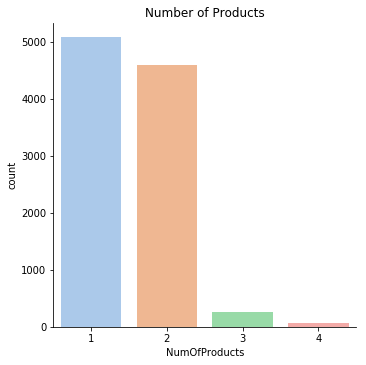

In [215]:
plt.figure(figsize = (15,15))
sns.catplot(x = "NumOfProducts", kind = 'count', palette = 'pastel', data = data )
plt.title('Number of Products')
plt.show()

**Most of the customers have 1 or 2 products from bank**

<Figure size 1080x1080 with 0 Axes>

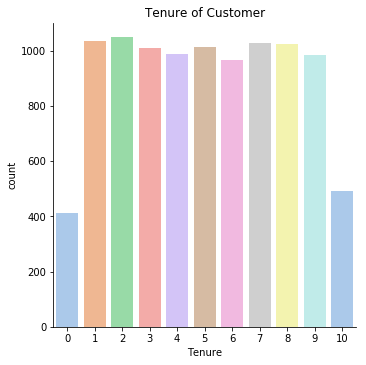

In [216]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'Tenure', kind = 'count', palette = 'pastel', data = data)
plt.title("Tenure of Customer")
plt.show()

**Most customers have tenure of in between 1-8 years in bank **

<Figure size 1080x1080 with 0 Axes>

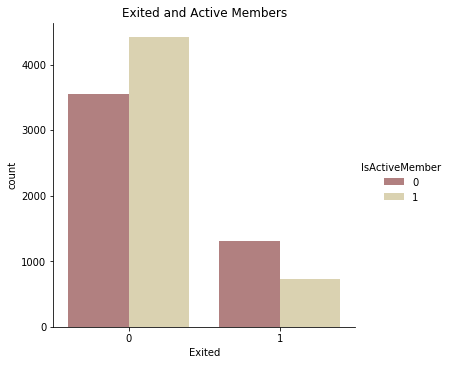

In [217]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'Exited', kind = 'count', hue = 'IsActiveMember', palette = 'pink', data = data)
plt.title("Exited and Active Members")
plt.show()

**Non active members are likely to exit more, quite understandable**

<Figure size 1080x1080 with 0 Axes>

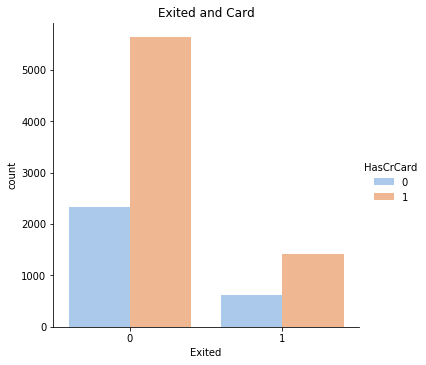

In [218]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'Exited', kind = 'count', hue = 'HasCrCard', palette = 'pastel', data = data)
plt.title("Exited and Card")
plt.show()

**Customers with credit card are likely to exit more**

<Figure size 1080x1080 with 0 Axes>

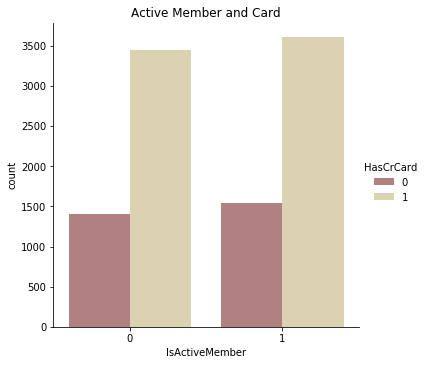

In [219]:
plt.figure(figsize = (15,15))
sns.catplot(x = 'IsActiveMember', kind = 'count', hue = 'HasCrCard', palette = 'pink', data = data)
plt.title('Active Member and Card')
plt.show()

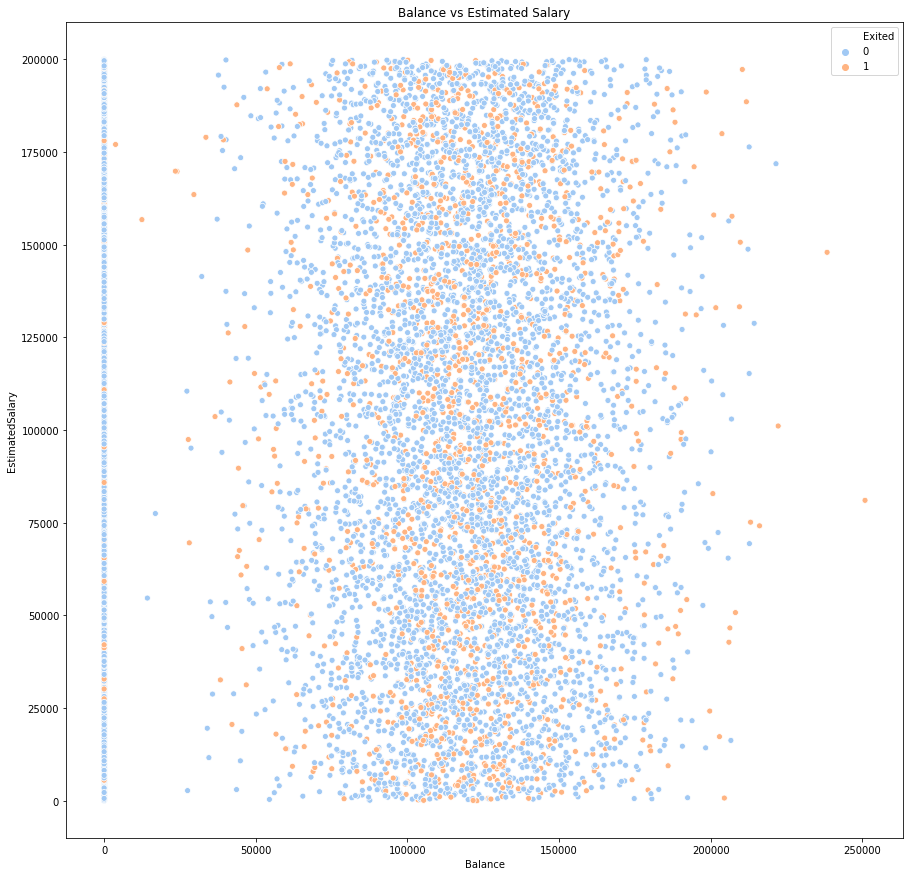

In [220]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'Balance', y = 'EstimatedSalary', hue = 'Exited',palette = 'pastel', data = data)
plt.title("Balance vs Estimated Salary")
plt.show()

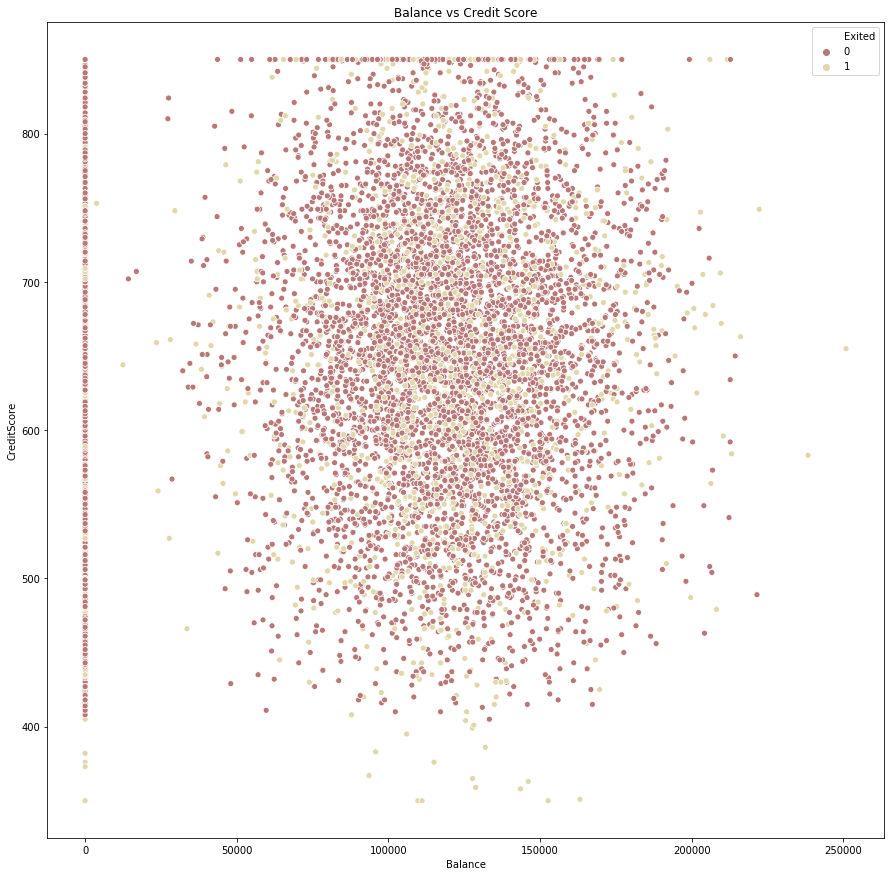

In [221]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'Balance', y = 'CreditScore', hue = 'Exited',palette = 'pink', data = data)
plt.title("Balance vs Credit Score")
plt.show()

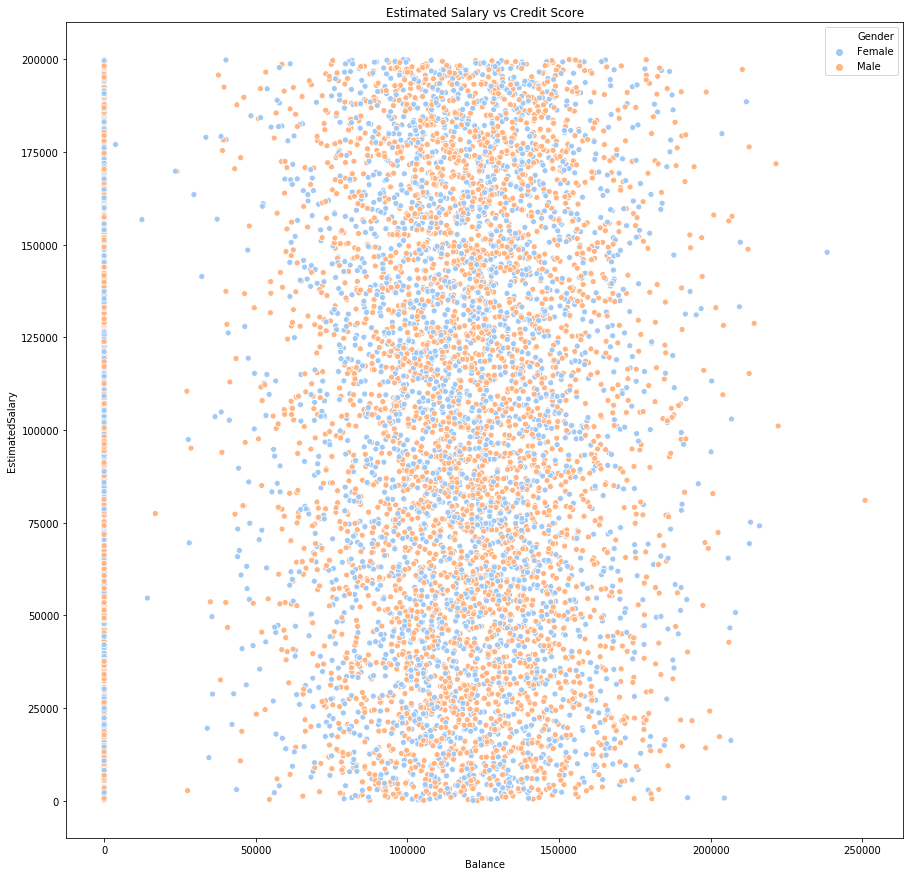

In [222]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'Balance', y = 'EstimatedSalary', hue = 'Gender',palette = 'pastel', data = data)
plt.title("Estimated Salary vs Credit Score")
plt.show()

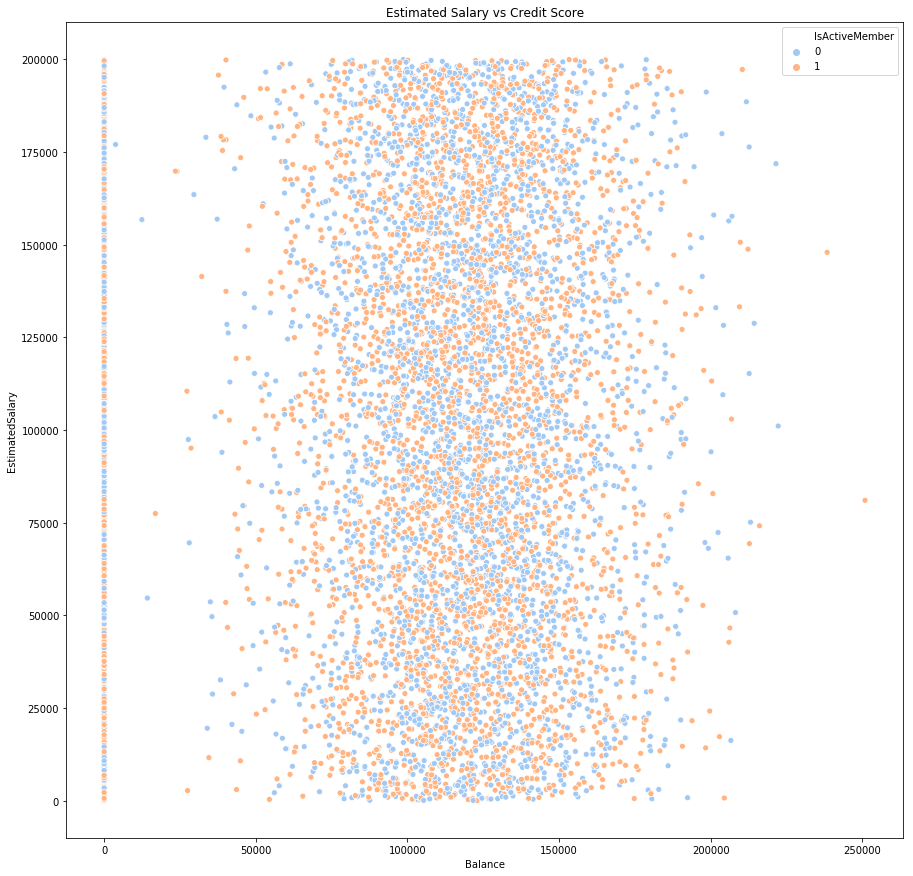

In [223]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = 'Balance', y = 'EstimatedSalary', hue = 'IsActiveMember',palette = 'pastel', data = data)
plt.title("Estimated Salary vs Credit Score")
plt.show()

# Data Preprocessing

In [224]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [225]:
data.isnull().sum() #checking for null values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

For checking skwness in the data

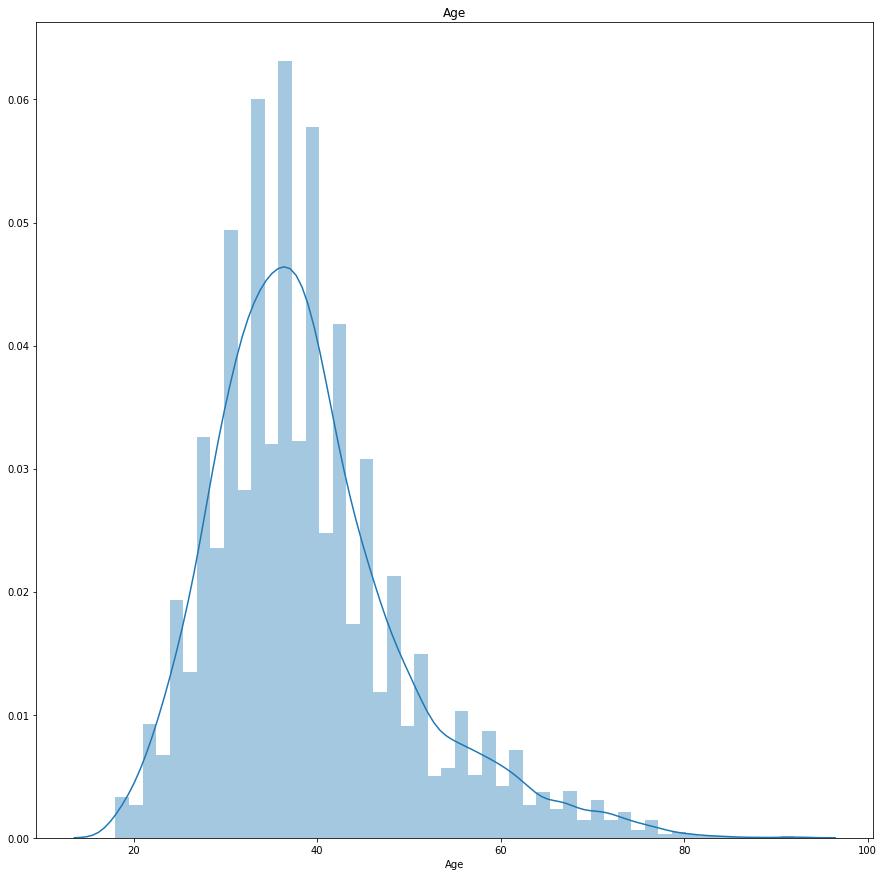

In [226]:
plt.figure(figsize = (15,15))
sns.distplot(data['Age'])
plt.title("Age")
plt.show()

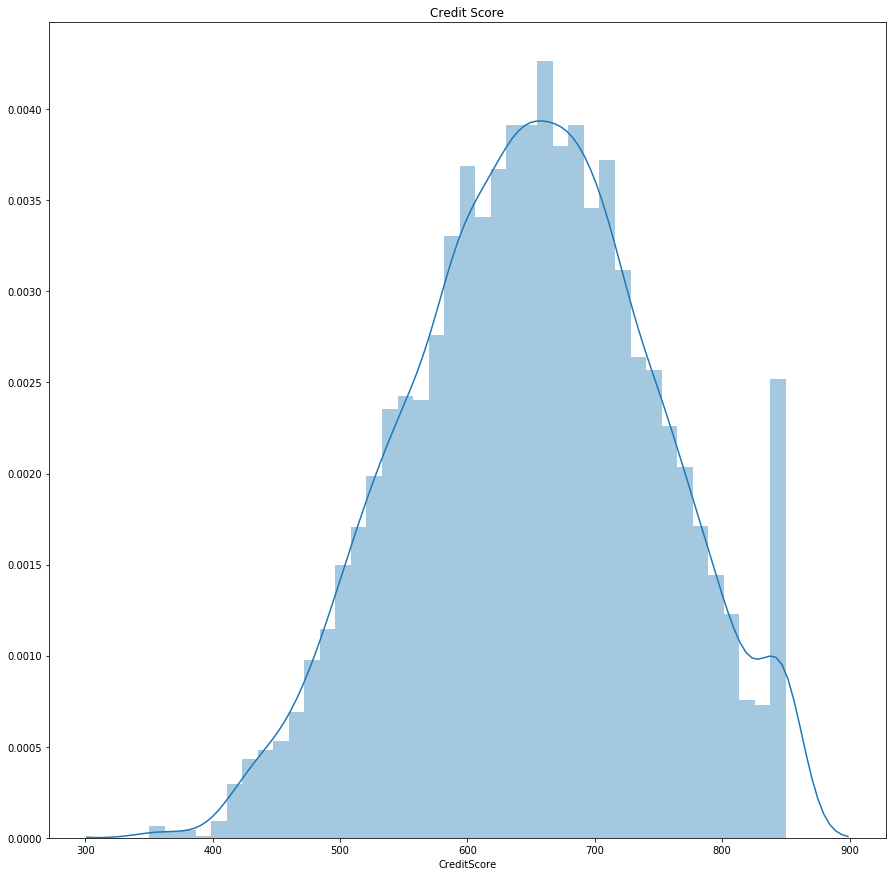

In [227]:
plt.figure(figsize = (15,15))
sns.distplot(data["CreditScore"])
plt.title("Credit Score")
plt.show()

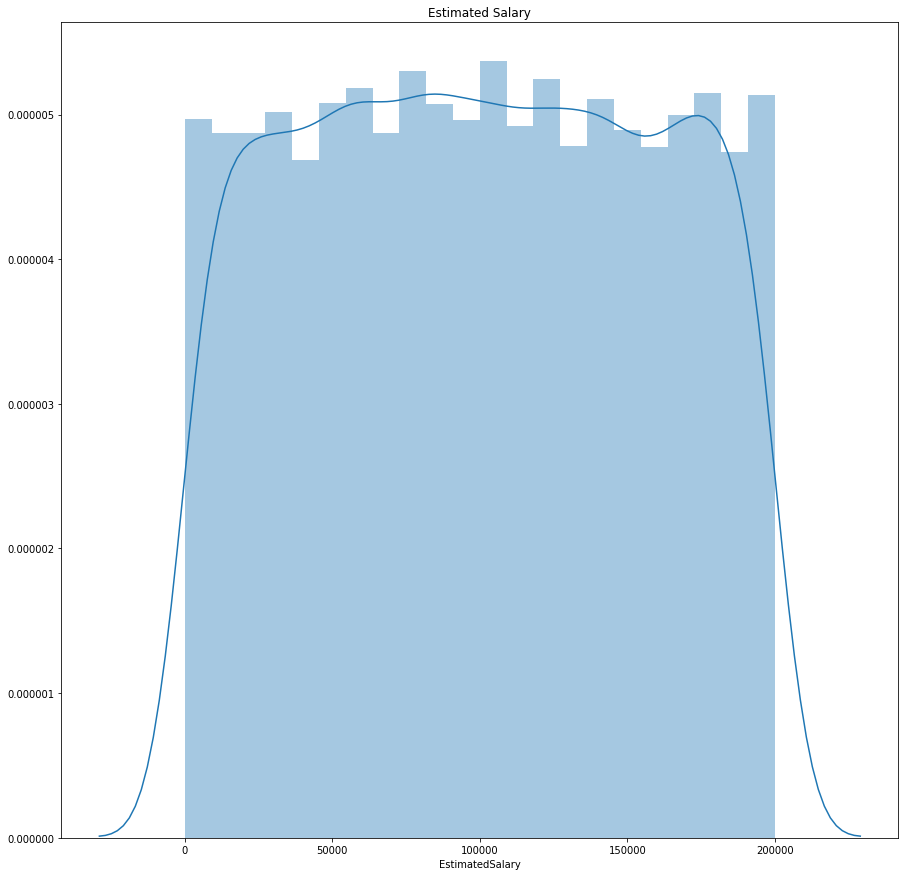

In [228]:
plt.figure(figsize = (15,15))
sns.distplot(data["EstimatedSalary"])
plt.title("Estimated Salary")
plt.show()

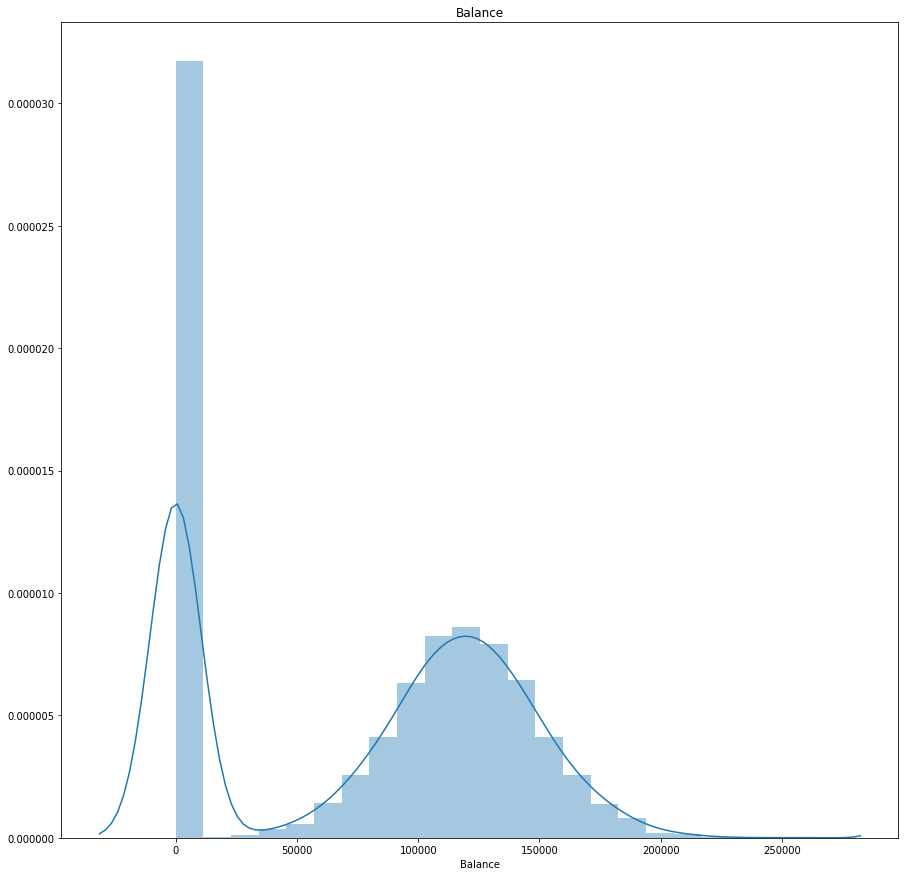

In [229]:
plt.figure(figsize = (15,15))
sns.distplot(data["Balance"])
plt.title("Balance")
plt.show()

**For detecting outliers in data**

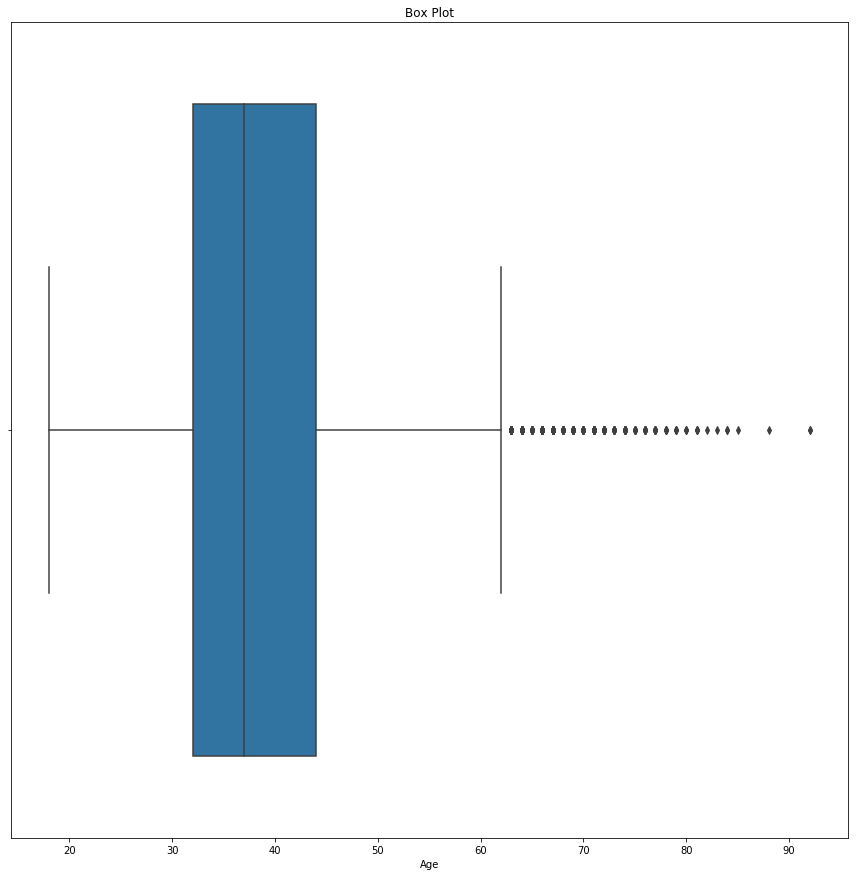

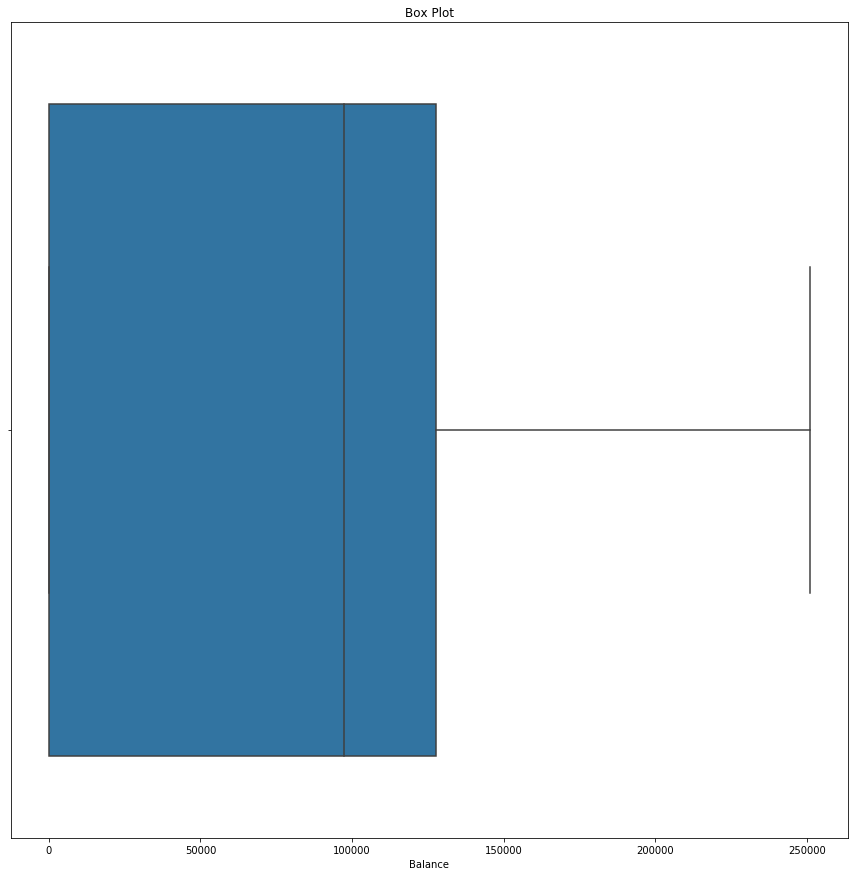

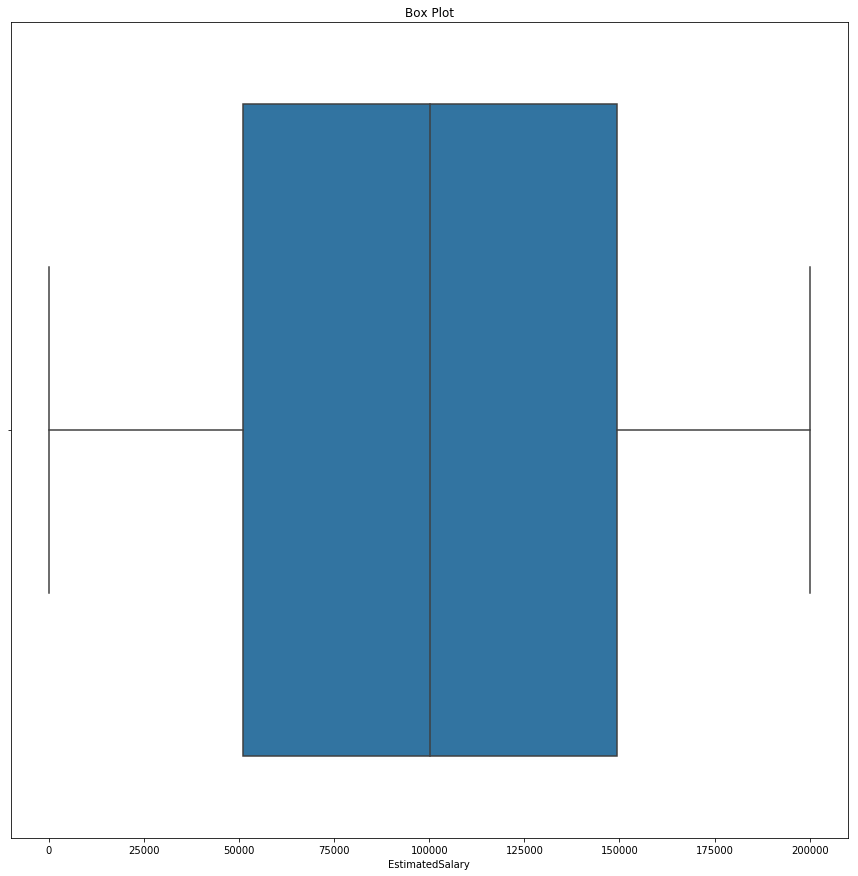

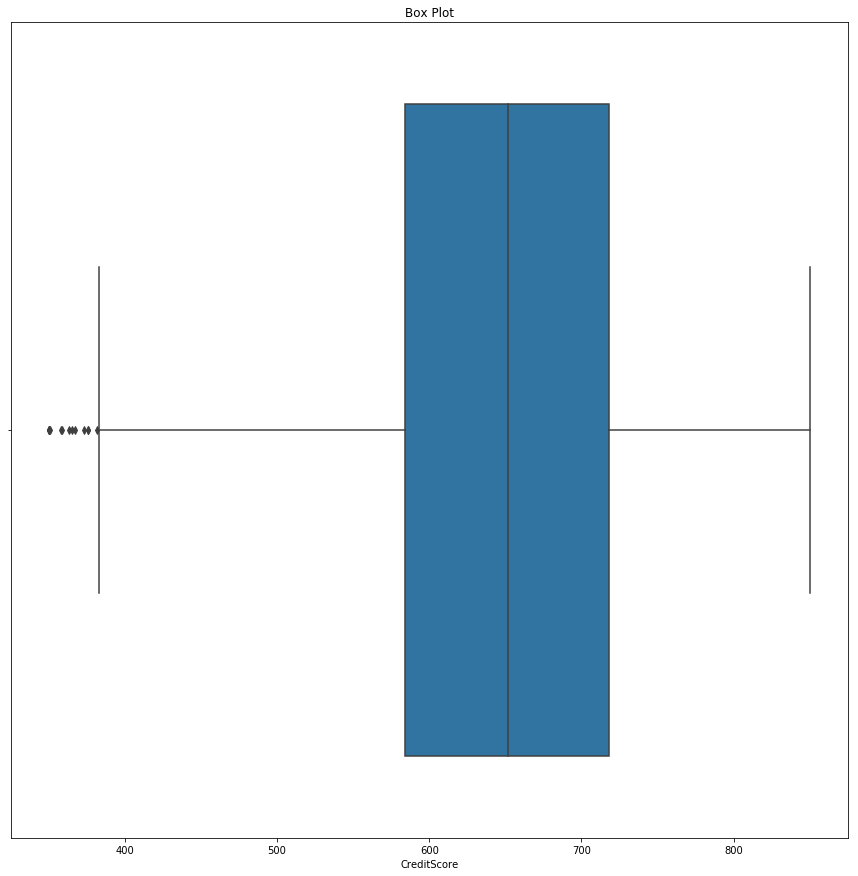

In [230]:
column = ["Age", "Balance", "EstimatedSalary", "CreditScore"]
for i in column:
    plt.figure(figsize = (15,15))
    sns.boxplot(data[i])
    plt.title('Box Plot')
    plt.show()

In [231]:
data = data[(data["Age"] <60)]
data = data[(data["CreditScore"] >400)]

In [232]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.00000
mean,650.898266,37.373308,5.018084,76521.194565,1.531514,0.704949,0.500212,100176.595754,0.19797
std,95.810805,8.316748,2.887855,62444.638692,0.579448,0.456090,0.500026,57503.154035,0.39849
min,401.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.00000
25%,584.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51228.457500,0.00000
50%,652.000000,37.000000,5.000000,97302.205000,1.000000,1.000000,1.000000,100350.530000,0.00000
75%,717.000000,42.000000,8.000000,127644.240000,2.000000,1.000000,1.000000,149406.545000,0.00000
max,850.000000,59.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.00000


**Normalizing the data**

In [233]:
data["Balance"] = QuantileTransformer().fit_transform(data["Balance"].values.reshape(-1,1))
data["CreditScore"] = QuantileTransformer().fit_transform(data["CreditScore"].values.reshape(-1,1))
data["EstimatedSalary"] = QuantileTransformer().fit_transform(data["EstimatedSalary"].values.reshape(-1,1))
data["Age"] = QuantileTransformer().fit_transform(data["Age"].values.reshape(-1,1))

In [234]:
data["Balance"] = StandardScaler().fit_transform(data["Balance"].values.reshape(-1,1))
data["CreditScore"] = StandardScaler().fit_transform(data["CreditScore"].values.reshape(-1,1))
data["EstimatedSalary"] = StandardScaler().fit_transform(data["CreditScore"].values.reshape(-1,1))


In [235]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.456000e+03,9456.000000,9456.000000,9.456000e+03,9456.000000,9456.000000,9456.000000,9.456000e+03,9456.00000
mean,3.497156e-16,0.500092,5.018084,-1.539002e-16,1.531514,0.704949,0.500212,9.052263e-17,0.19797
std,1.000053e+00,0.288540,2.887855,1.000053e+00,0.579448,0.456090,0.500026,1.000053e+00,0.39849
min,-1.730136e+00,0.000000,0.000000,-1.211056e+00,1.000000,0.000000,0.000000,-1.730136e+00,0.00000
25%,-8.629531e-01,0.229229,3.000000,-1.211056e+00,1.000000,0.000000,0.000000,-8.629531e-01,0.00000
50%,7.675240e-04,0.512012,5.000000,1.829459e-01,1.000000,1.000000,1.000000,7.675240e-04,0.00000
75%,8.610264e-01,0.733734,8.000000,8.787345e-01,2.000000,1.000000,1.000000,8.610264e-01,0.00000
max,1.728209e+00,1.000000,10.000000,1.576003e+00,4.000000,1.000000,1.000000,1.728209e+00,1.00000


**Label Encoding for categorical columns**

In [236]:
data["Geography"] = LabelEncoder().fit_transform(data["Geography"])
data["Gender"] = LabelEncoder().fit_transform(data["Gender"])

In [237]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.447536,0,0,0.733734,2,-1.211056,1,1,1,-0.447536,1
1,-0.575623,2,0,0.697698,1,0.001502,1,0,1,-0.575623,0
2,-1.505118,0,0,0.733734,8,1.411246,3,1,0,-1.505118,1
3,0.632547,0,0,0.610110,1,-1.211056,2,0,0,0.632547,0
4,1.728209,2,0,0.766266,2,0.827109,1,1,1,1.728209,0


In [238]:
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.008769,-0.004181,-0.010590,0.000090,0.009128,0.009310,-0.003054,0.022464,1.000000,-0.017423
Geography,0.008769,1.000000,0.001382,0.035955,0.004042,0.064577,0.008042,-0.012153,0.008056,0.008769,0.036878
Gender,-0.004181,0.001382,1.000000,-0.032190,0.015198,0.013669,-0.022634,0.006354,0.020352,-0.004181,-0.105182
Age,-0.010590,0.035955,-0.032190,1.000000,-0.009384,0.041863,-0.029477,-0.018187,-0.011665,-0.010590,0.345086
Tenure,0.000090,0.004042,0.015198,-0.009384,1.000000,-0.013175,0.014734,0.020272,-0.026627,0.000090,-0.012670
Balance,0.009128,0.064577,0.013669,0.041863,-0.013175,1.000000,-0.302849,-0.008085,-0.005267,0.009128,0.113251
NumOfProducts,0.009310,0.008042,-0.022634,-0.029477,0.014734,-0.302849,1.000000,0.002371,0.008738,0.009310,-0.048550
HasCrCard,-0.003054,-0.012153,0.006354,-0.018187,0.020272,-0.008085,0.002371,1.000000,-0.011784,-0.003054,-0.009116
IsActiveMember,0.022464,0.008056,0.020352,-0.011665,-0.026627,-0.005267,0.008738,-0.011784,1.000000,0.022464,-0.137686
EstimatedSalary,1.000000,0.008769,-0.004181,-0.010590,0.000090,0.009128,0.009310,-0.003054,0.022464,1.000000,-0.017423


# Splitting Train and Test Data

In [239]:
y = data["Exited"]

In [240]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [241]:
data.drop(["Exited"], axis = 1, inplace = True)

In [242]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.447536,0,0,0.733734,2,-1.211056,1,1,1,-0.447536
1,-0.575623,2,0,0.697698,1,0.001502,1,0,1,-0.575623
2,-1.505118,0,0,0.733734,8,1.411246,3,1,0,-1.505118
3,0.632547,0,0,0.610110,1,-1.211056,2,0,0,0.632547
4,1.728209,2,0,0.766266,2,0.827109,1,1,1,1.728209


In [243]:
train_x,test_x,train_y,test_y = train_test_split(data,y, test_size = 0.3, random_state = 50)

# Model Fitting

# Logistic Regression

In [244]:
logistic = LogisticRegression()
logistic.fit(train_x,train_y)
log_y = logistic.predict(test_x)
print(accuracy_score(log_y,test_y))

0.8290447655974621


**Tuning the model**

In [245]:
random_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,'penalty':['l1','l2']}
print(random_parameters)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}


In [246]:
random_para = RandomizedSearchCV(estimator = logistic, param_distributions = random_parameters, n_iter = 50, cv = 10, verbose=2, random_state= 50, n_jobs = -1)
random_para.fit(train_x,train_y)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 14 is smaller than n_iter=50. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=50, refit=True,
              

In [247]:
random_para.best_params_

{'penalty': 'l2', 'C': 1}

In [256]:
logistic2 = LogisticRegression(penalty ='l2', C =1)
logistic2.fit(train_x,train_y)
log_y = logistic2.predict(test_x)
print(accuracy_score(log_y,test_y))

0.8290447655974621


**Feature Selection**

In [257]:
feature = SelectFromModel(LogisticRegression())
feature.fit(train_x,train_y)
feature_support = feature.get_support()
feature_selected = train_x.loc[:,feature_support].columns.tolist()
print(str(len(feature_selected)), 'selected features')

2 selected features


In [258]:
print(feature_selected)

['Age', 'IsActiveMember']


In [259]:
train_x_feature = train_x[["Age", "IsActiveMember"]]
train_x_feature.head()

,Age,IsActiveMember
2371,0.019520,1
6521,0.413914,0
9487,0.272773,1
2253,0.697698,1
2120,0.957958,1


In [260]:
test_x_feature = test_x[["Age", "IsActiveMember"]]
test_x_feature.head()

,Age,IsActiveMember
1624,0.056557,0
2169,0.766266,1
4285,0.655155,0
71,0.155155,0
4049,0.318318,1


In [261]:
logistic.fit(train_x_feature, train_y)
log_y_feature = logistic.predict(test_x_feature)
print(accuracy_score(log_y_feature, test_y))

0.8304547056750088


# Random Forest Classifier

In [262]:
random = RandomForestClassifier()
random.fit(train_x,train_y)
random_y = random.predict(test_x)
print(accuracy_score(random_y,test_y))

0.8579485371871696


**Tuning Parameters**

In [263]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [264]:
random_para = RandomizedSearchCV(estimator = random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_para.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [265]:
random_para.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [278]:
random_2 = RandomForestClassifier(n_estimators=1400,min_samples_split =10,min_samples_leaf= 2,max_features = 'sqrt',max_depth=80,bootstrap= True)
random_2.fit(train_x,train_y)
random_2_y = random_2.predict(test_x)
print(accuracy_score(random_2_y,test_y)) 

0.8621783574198096


**Feature Selection**

In [267]:
feature = SelectFromModel(RandomForestClassifier(n_estimators=1400,min_samples_split =10,min_samples_leaf= 2,max_features = 'sqrt',max_depth=80,bootstrap= True))
feature.fit(train_x,train_y)
feature_support = feature.get_support()
feature_selected = train_x.loc[:,feature_support].columns.tolist()
print(str(len(feature_selected)), 'selected features')

3 selected features


In [268]:
feature_selected

['Age', 'Balance', 'NumOfProducts']

In [269]:
train_x_feature = train_x[['Age', 'Balance', 'NumOfProducts']]
train_x_feature.head()

,Age,Balance,NumOfProducts
2371,0.019520,-0.136437,1
6521,0.413914,0.155280,2
9487,0.272773,-1.211056,1
2253,0.697698,-1.211056,1
2120,0.957958,0.655888,1


In [270]:
test_x_feature = test_x[['Age', 'Balance', 'NumOfProducts']]
test_x_feature.head()

,Age,Balance,NumOfProducts
1624,0.056557,-1.211056,2
2169,0.766266,-0.022564,2
4285,0.655155,0.663712,1
71,0.155155,-1.211056,1
4049,0.318318,-1.211056,2


In [271]:
random_2.fit(train_x_feature,train_y)
random_2_feature_y = random_2.predict(test_x_feature)
print(accuracy_score(random_2_feature_y,test_y))

0.8375044060627423


# Naive Bayes

In [272]:
bayes = GaussianNB()
bayes.fit(train_x,train_y)
bayes_y = bayes.predict(test_x)
print(accuracy_score(bayes_y,test_y))

0.8463165315474093


**Feature Selection**

In [273]:
train_x_feature = train_x[["Age", "Balance"]] #based on correlation values
train_x_feature.head()

,Age,Balance
2371,0.019520,-0.136437
6521,0.413914,0.155280
9487,0.272773,-1.211056
2253,0.697698,-1.211056
2120,0.957958,0.655888


In [274]:
test_x_feature = test_x[["Age", "Balance"]] #based on correlation values
test_x_feature.head()

,Age,Balance
1624,0.056557,-1.211056
2169,0.766266,-0.022564
4285,0.655155,0.663712
71,0.155155,-1.211056
4049,0.318318,-1.211056


In [275]:
bayes.fit(train_x_feature,train_y)
bayes_feature_y =bayes.predict(test_x_feature)
print(accuracy_score(bayes_feature_y, test_y))

0.8121254846669017


# Conclusion

The highest accuracy we achieved is by hypertuning RandomForestClassifier and using all the features.

In [276]:
print(str((accuracy_score(random_2_y,test_y)) * 100) + "%")

86.25308424391963%


**When we get time this notebook will be updated**

If you like my work, please upvote.